In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import keras
from sklearn.feature_selection import f_regression
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tqdm import trange

# Создание функций для обработки данных

In [10]:
def transform_date(my_date):
    btc_counts = my_date.split("\n")

    my_arr = np.asarray(btc_counts)

    new_btc = []
    for i in my_arr:
        i = i[1:-1]
        new_btc.append(i)
        
    for i in trange(len(new_btc)):
        new_btc[i] = new_btc[i].split(',')
    
    for i in trange(len(new_btc)):
        for j in range(len(new_btc[i])):
            new_btc[i][j] = new_btc[i][j].split(":")
        
    columns = []
    for i in trange(len(new_btc[0])):
        columns.append(new_btc[0][i][0][1:-1])
    
    for i in trange(len(new_btc)):
        for j in range(len(new_btc[i])):
            new_btc[i][j].pop(0)
        
    for i in trange(len(new_btc)-1):
        new_btc[i][0] = ''.join(new_btc[i][0])
    
        new_btc[i][1] = ''.join(new_btc[i][1])
        new_btc[i][1] = int(new_btc[i][1])
    
        new_btc[i][2] = ''.join(new_btc[i][2])
    
        new_btc[i][3] = ''.join(new_btc[i][3])
        new_btc[i][3] = int(new_btc[i][3])
    
        new_btc[i][4] = ''.join(new_btc[i][4])
        new_btc[i][4] = float(new_btc[i][4][1:-1])
    
        new_btc[i][5] = ''.join(new_btc[i][5])
        new_btc[i][5] = float(new_btc[i][5][1:-1])
    
        new_btc[i][6] = ''.join(new_btc[i][6])
        new_btc[i][6] = int(new_btc[i][6])
    
        new_btc[i][7] = ''.join(new_btc[i][7])
        new_btc[i][7] = int(new_btc[i][7])
    
        new_btc[i][8] = ''.join(new_btc[i][8])
        new_btc[i][8] = int(new_btc[i][8])
    
        new_btc[i][9] = ''.join(new_btc[i][9])
    
        new_btc[i][10] = ''.join(new_btc[i][10])
    
    my_pd = pd.DataFrame(new_btc, columns = columns)
    return my_pd.dropna()

In [11]:
def graphics_dynamic(dataframe):
    fig, (ax1) = plt.subplots(figsize = (20,10), nrows=1, ncols=1)
    ax1.plot(dataframe.E, dataframe.p)
    ax1.set_title('Dynamic')
    ax1.set_ylim(ymin=min(dataframe.p), ymax=max(dataframe.p))
    ax1.set_xlim(xmin=min(dataframe.E), xmax=max(dataframe.E))

    fig.tight_layout()

In [12]:
def graphics_quant(dataframe):
    fig, (ax3) = plt.subplots(figsize = (20,10), nrows=1, ncols=1)
    ax3.plot(dataframe.E, dataframe.q)
    ax3.set_title('Quantity')
    ax3.set_ylim(ymin=min(dataframe.q), ymax=1)
    ax3.set_xlim(xmin=min(dataframe.E), xmax=max(dataframe.E))

In [18]:
def transform_tomM(dataframe1):
    dig = 100
    dataframe = pd.DataFrame({'time':[i for i in range(dataframe1.shape[0]//dig)], 'max':0, 'min':0, 'close':0})
    for i in trange(0, example1.shape[0], dig):
        dataframe['max'][i/dig] = dataframe1.loc[i:i+dig, 'p'].max()
        dataframe['min'][i/dig] = dataframe1.loc[i:i+dig, 'p'].min()
        try:
            dataframe['close'][i/dig] = dataframe1.loc[i+dig, 'p']
        except:
            dataframe['close'][i/dig] = dataframe1.loc[i:i+dig-(i+dig-dataframe1.shape[0])]
    return dataframe

In [14]:
scaler = MinMaxScaler(feature_range=(0, 1))

# Набор данных

In [15]:
with open("C:/Users/rsoko/Desktop/Edu/PyProjetcs/venv/binance_29032022.txt", "r") as f:
    text1 = f.read()

In [16]:
example1 = transform_date(text1)
example1

100%|██████████████████████████████████████████████████████████████████████| 613271/613271 [00:03<00:00, 195809.04it/s]


,e,E,s,t,p,q,b,a,T,m,M
0,"""trade""",1.648568e+12,"""BTCUSDT""",1.308670e+09,47912.85,0.00806,1.000701e+10,1.000701e+10,1.648568e+12,true,true
1,"""trade""",1.648568e+12,"""BTCUSDT""",1.308670e+09,47912.85,0.04038,1.000701e+10,1.000701e+10,1.648568e+12,true,true
2,"""trade""",1.648568e+12,"""BTCUSDT""",1.308670e+09,47912.86,0.00062,1.000701e+10,1.000701e+10,1.648568e+12,false,true
3,"""trade""",1.648568e+12,"""BTCUSDT""",1.308670e+09,47912.85,0.00037,1.000701e+10,1.000701e+10,1.648568e+12,true,true
4,"""trade""",1.648568e+12,"""BTCUSDT""",1.308670e+09,47912.85,0.00626,1.000701e+10,1.000701e+10,1.648568e+12,true,true
...,...,...,...,...,...,...,...,...,...,...,...
613266,"""trade""",1.648610e+12,"""BTCUSDT""",1.309284e+09,47390.90,0.00396,1.001286e+10,1.001286e+10,1.648610e+12,true,true
613267,"""trade""",1.648610e+12,"""BTCUSDT""",1.309284e+09,47390.90,0.00397,1.001286e+10,1.001286e+10,1.648610e+12,true,true
613268,"""trade""",1.648610e+12,"""BTCUSDT""",1.309284e+09,47390.90,0.01352,1.001286e+10,1.001286e+10,1.648610e+12,true,true
613269,"""trade""",1.648610e+12,"""BTCUSDT""",1.309284e+09,47390.90,0.00359,1.001286e+10,1.001286e+10,1.648610e+12,true,true


# Преобразование данных

In [19]:
example1_ = transform_tomM(example1)

  0%|                                                                                         | 0/6133 [00:00<?, ?it/s]C:\Users\rsoko\AppData\Local\Temp\ipykernel_14960\672723597.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['close'][i/dig] = dataframe1.loc[i+dig, 'p']
C:\Users\rsoko\AppData\Local\Temp\ipykernel_14960\672723597.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['max'][i/dig] = dataframe1.loc[i:i+dig, 'p'].max()
100%|████████████████████████████████████████████████████████████████████████████| 6133/6133 [00:02<00:00, 2817.47it/s]


In [20]:
example1_

,time,max,min,close
0,0,47915.00,47912.85,47915.00
1,1,47916.09,47914.99,47916.09
2,2,47925.07,47916.09,47925.07
3,3,47925.07,47916.07,47916.07
4,4,47922.46,47915.90,47922.46
...,...,...,...,...
6127,6127,47378.70,47375.48,47378.69
6128,6128,47388.54,47378.69,47388.53
6129,6129,47388.54,47387.85,47387.86
6130,6130,47390.18,47387.85,47389.99


<function matplotlib.pyplot.show(close=None, block=None)>

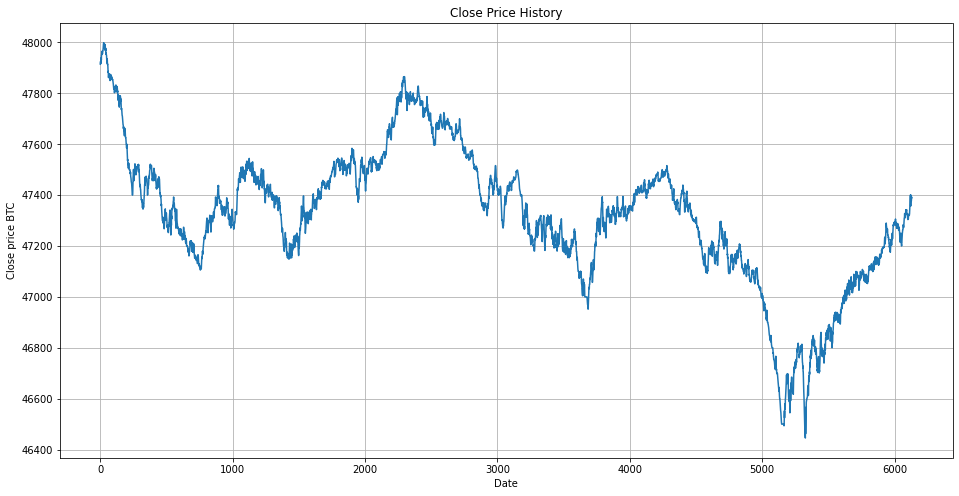

In [21]:
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(example1_['close'])
plt.xlabel('Date')
plt.ylabel('Close price BTC')
plt.grid()
plt.show

# Подготовка данных

In [22]:
x_dataset = scaler.fit_transform(example1_)
x_dataset

array([[0.00000000e+00, 9.45426905e-01, 9.47370800e-01, 9.45937074e-01],
       [1.63105529e-04, 9.46135055e-01, 9.48752381e-01, 9.46638688e-01],
       [3.26211059e-04, 9.51969179e-01, 9.49462539e-01, 9.52418960e-01],
       ...,
       [9.99673789e-01, 6.03396526e-01, 6.08431518e-01, 6.06626072e-01],
       [9.99836894e-01, 6.04462000e-01, 6.08431518e-01, 6.07997116e-01],
       [1.00000000e+00, 6.06618937e-01, 6.09813099e-01, 6.08582868e-01]])

In [23]:
y_dataset = x_dataset[0:,3]
y_dataset

array([0.94593707, 0.94663869, 0.95241896, ..., 0.60662607, 0.60799712,
       0.60858287])

In [24]:
x_train = []
y_train = []

for i in trange(0, round(y_dataset.shape[0]*0.8)):
    x_train.append(x_dataset[i])
    y_train.append(y_dataset[i+1])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

100%|██████████████████████████████████████████████████████████████████████████| 4906/4906 [00:00<00:00, 981598.79it/s]


In [25]:
test_data = example1_[round(y_dataset.shape[0]*0.8):]
x_test = []
y_test = y_dataset[round(y_dataset.shape[0]*0.8)+1:]
for i in trange(round(y_dataset.shape[0]*0.8), round(y_dataset.shape[0])):
  x_test.append(x_dataset[i])
x_test = np.array(x_test)

100%|█████████████████████████████████████████████████████████████████████████| 1226/1226 [00:00<00:00, 1226088.87it/s]


# LSTM

In [26]:
model = Sequential()
model.add(LSTM(x_train.shape[1], return_sequences=True, input_shape=[x_train.shape[1], 1]))
model.add(LSTM(x_train.shape[1], return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size = 1, epochs=30)
model.evaluate(x_test[0:-1], y_test)
print(model.summary())

Epoch 1/30
4906/4906 [==============================] - 20s 4ms/step - loss: 0.0103
Epoch 2/30
4906/4906 [==============================] - 17s 3ms/step - loss: 1.0424e-04
Epoch 3/30
4906/4906 [==============================] - 18s 4ms/step - loss: 9.7942e-05
Epoch 4/30
4906/4906 [==============================] - 17s 4ms/step - loss: 9.9233e-05
Epoch 5/30
4906/4906 [==============================] - 16s 3ms/step - loss: 9.5629e-05
Epoch 6/30
4906/4906 [==============================] - 16s 3ms/step - loss: 9.6764e-05
Epoch 7/30
4906/4906 [==============================] - 17s 4ms/step - loss: 9.4055e-05
Epoch 8/30
4906/4906 [==============================] - 17s 4ms/step - loss: 9.0171e-05
Epoch 9/30
4906/4906 [==============================] - 21s 4ms/step - loss: 8.7446e-05
Epoch 10/30
4906/4906 [==============================] - 25s 5ms/step - loss: 8.9174e-05
Epoch 11/30
4906/4906 [==============================] - 25s 5ms/step - loss: 8.5976e-05
Epoch 12/30
4906/4906 [===========

# LSTM предсказание

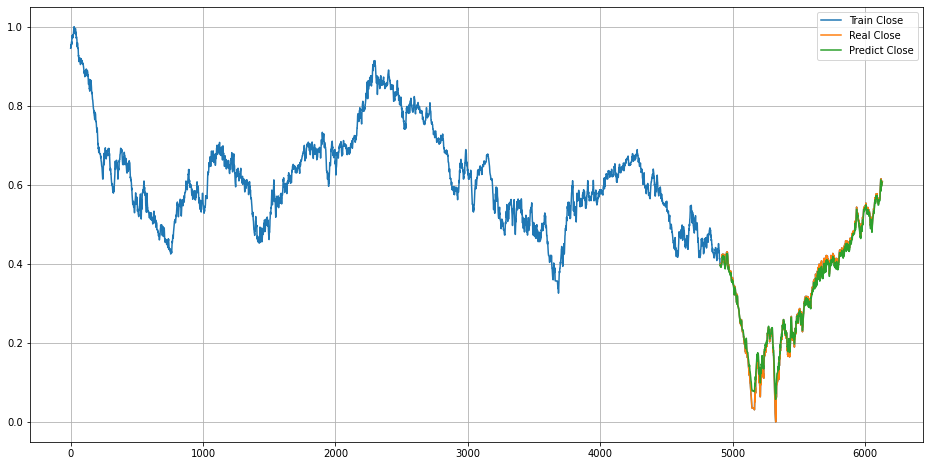

In [27]:
y_pred = model.predict(x_test) 
fig, ax = plt.subplots(1, figsize = (16,8))
ax.plot(example1_['time'],y_dataset)
ax.plot(example1_['time'][y_train.shape[0]+1:], y_test)
ax.plot(example1_['time'][y_train.shape[0]:], y_pred)
plt.legend(['Train Close', 'Real Close', 'Predict Close'])
plt.grid()

# Построение нейронной сети без LSTM слоя

In [28]:
model1 = Sequential()
model1.add(Dense(x_train.shape[1], input_shape=[x_train.shape[1], 1]))
model1.add(Dense(x_train.shape[1]))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss = 'mean_squared_error')
model1.fit(x_train, y_train, batch_size = 1, epochs=30)
model1.evaluate(x_test[0:-1], y_test)
print(model1.summary())

Epoch 1/30
4906/4906 [==============================] - 5s 1ms/step - loss: 0.0143
Epoch 2/30
4906/4906 [==============================] - 5s 978us/step - loss: 0.0133
Epoch 3/30
4906/4906 [==============================] - 5s 987us/step - loss: 0.0134
Epoch 4/30
4906/4906 [==============================] - 5s 975us/step - loss: 0.0133
Epoch 5/30
4906/4906 [==============================] - 5s 973us/step - loss: 0.0133
Epoch 6/30
4906/4906 [==============================] - 5s 1ms/step - loss: 0.0132
Epoch 7/30
4906/4906 [==============================] - 5s 973us/step - loss: 0.0133
Epoch 8/30
4906/4906 [==============================] - 5s 957us/step - loss: 0.0132
Epoch 9/30
4906/4906 [==============================] - 5s 966us/step - loss: 0.0132
Epoch 10/30
4906/4906 [==============================] - 5s 966us/step - loss: 0.0132
Epoch 11/30
4906/4906 [==============================] - 5s 977us/step - loss: 0.0132
Epoch 12/30
4906/4906 [==============================] - 5s 983us/s

# Предсказание нейронной сетью без слоя LSTM

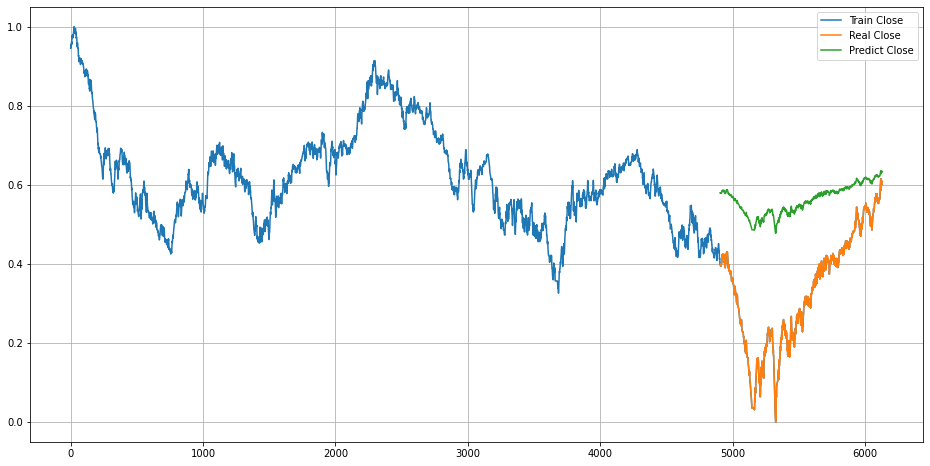

In [29]:
y_pred1 = model1.predict(x_test) 
fig, ax = plt.subplots(1, figsize = (16,8))
ax.plot(example1_['time'],y_dataset)
ax.plot(example1_['time'][y_train.shape[0]+1:], y_test)
ax.plot(example1_['time'][y_train.shape[0]:], y_pred1[0:, 3])
plt.legend(['Train Close', 'Real Close', 'Predict Close'])
plt.grid()